In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sng
import matplotlib.pyplot as plt

In [16]:
from google.colab import files
uploaded = files.upload()

Saving diamonds.csv to diamonds.csv


In [17]:
data = pd.read_csv('/content/diamonds.csv')
data.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [18]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [19]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [23]:
data=data.drop(['depth','table','x','y','z'],axis=1)

KeyError: ignored

In [24]:
data.head(2)

,Unnamed: 0,carat,cut,color,clarity,price
0,1,0.23,Ideal,E,SI2,326
1,2,0.21,Premium,E,SI1,326


In [25]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
price           int64
dtype: object

In [26]:
data['price']=data.price.astype(float)
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
price         float64
dtype: object

Text(0.5, 1.0, 'Diamond Price Distribution')

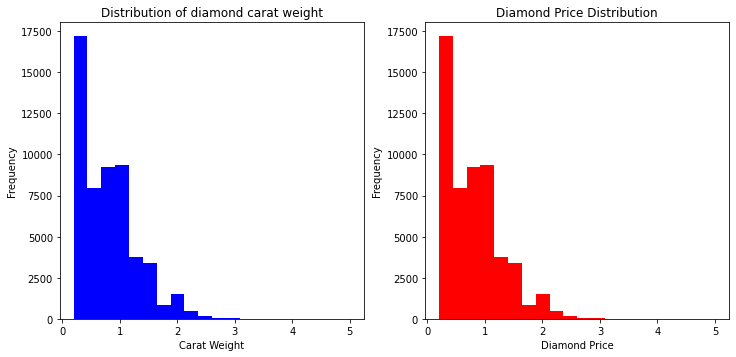

In [27]:
plt.figure(figsize=[12,12])
plt.subplot(221)
# carat weight distribution 
plt.hist(data['carat'],bins=20,color='b')
plt.xlabel("Carat Weight")
plt.ylabel("Frequency")
plt.title("Distribution of diamond carat weight")
plt.subplot(222)
#distribution of price value
plt.hist(data['carat'],bins=20,color='r')
plt.xlabel("Diamond Price")
plt.ylabel("Frequency")
plt.title("Diamond Price Distribution")


In [28]:
#Creating independent and Dependent variable 
data.head(1)

,Unnamed: 0,carat,cut,color,clarity,price
0,1,0.23,Ideal,E,SI2,326.0


In [29]:
#converting categorical data to numeric data
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
label=l1.fit_transform(data['cut'])
l1.classes_ 


array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [30]:
label

array([2, 3, 1, ..., 4, 3, 2])

In [31]:
data['cut_label']=label

In [32]:
data.head(2)

,Unnamed: 0,carat,cut,color,clarity,price,cut_label
0,1,0.23,Ideal,E,SI2,326.0,2
1,2,0.21,Premium,E,SI1,326.0,3


In [33]:
l2=LabelEncoder()
label1=l2.fit_transform(data['clarity'])
data['clarity_label']=label1
data.head(2)

,Unnamed: 0,carat,cut,color,clarity,price,cut_label,clarity_label
0,1,0.23,Ideal,E,SI2,326.0,2,3
1,2,0.21,Premium,E,SI1,326.0,3,2


In [34]:
data['color']=data['color'].map({'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7,'NA':8}) #.astype(int)

In [35]:
data['color'].fillna(0)

0        2
1        2
2        2
3        6
4        7
        ..
53935    1
53936    1
53937    1
53938    5
53939    1
Name: color, Length: 53940, dtype: int64

In [36]:
data['color'].isnull().sum()

0

In [37]:
data['color']=data['color'].fillna(method='ffill')

In [38]:
data['color'].isnull().sum()

0

In [39]:
data.head(2)

,Unnamed: 0,carat,cut,color,clarity,price,cut_label,clarity_label
0,1,0.23,Ideal,2,SI2,326.0,2,3
1,2,0.21,Premium,2,SI1,326.0,3,2


In [40]:
#create independent and dependent variable
y=data['price']
y.head(1)

0    326.0
Name: price, dtype: float64

In [41]:
x=data.drop(['price','cut','clarity'],axis=1)
x.head(1)

,Unnamed: 0,carat,color,cut_label,clarity_label
0,1,0.23,2,2,3


In [42]:
#Training Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [44]:
len(x_train)

37758

In [43]:
len(y_test)

16182

In [45]:
len(data)

53940

In [46]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,price,cut_label,clarity_label
0,1,0.23,Ideal,2,SI2,326.0,2,3
1,2,0.21,Premium,2,SI1,326.0,3,2
2,3,0.23,Good,2,VS1,327.0,1,4
3,4,0.29,Premium,6,VS2,334.0,3,5
4,5,0.31,Good,7,SI2,335.0,1,3


In [47]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,price,cut_label,clarity_label
53935,53936,0.72,Ideal,1,SI1,2757.0,2,2
53936,53937,0.72,Good,1,SI1,2757.0,1,2
53937,53938,0.70,Very Good,1,SI1,2757.0,4,2
53938,53939,0.86,Premium,5,SI2,2757.0,3,3
53939,53940,0.75,Ideal,1,SI2,2757.0,2,3


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
pred=logreg.predict(x_test)

In [4]:
def prediction():
  carat=input("Enter the value of carat:")
  cut=int(input("Enter the value of cut:"))
  clarity=int(input("Enter the value of clarity:"))
  color=int(input("Enter the value of color:"))

  price=logreg.predict([[carat,cut,clarity,color]])
  print("Approximately Price of Diamond is:",price,'Rs')

  predi=prediction()
  predi